In [446]:
import pandas as pd
import numpy as np
import math
import time
import sys
import matplotlib.pyplot as plt

\\[-0.1em] \\

### Network Connections in a Meta-Network

#### How many network connections are there within a meta-network of size $N$

Suppose a meta-network consists of $N$ nodes, and is split into sub-networks of sizes $n_1, n_2, n_3, \dots, n_k$ such that:

$$
\sum_{i=1}^{k} n_i = N
$$


$$
\begin{aligned}
\textbf{Meta Network Combinations =} \left(2^{N^2} - 2^{N^2 - i} \right) & \\
\\
\text{Or the Number of On/Off Relationships between nodes in a network}) & \\
\end{aligned}
$$




$$
\textbf{Sub Network Combinations =} \left(\binom{N}{n_1} \left(2^{n_1^2} - 2^{n_1^2 - n_1} \right)\right)
\times \left(\binom{N}{n_2} \left(2^{n_2^2} - 2^{n_2^2 - n_2} \right)\right)
\times \left(\binom{N}{n_3} \left(2^{n_3^2} - 2^{n_3^2 - n_2} \right)\right)
\times \cdots
\times \left(\binom{N}{n_k} \left(2^{n_k^2} - 2^{n_k^2 - n_k} \right)\right)
$$

$$
\textbf{Or More Succintly } \dots\dots\space\prod_{i=1}^{k}\binom{N}{n_i} \left(2^{n_i^2} - 2^{n_i^2 - n_1} \right)
$$





$$
\text{Given a nework of size N split into k subsets, the inequality holds. The product of the sub-combinations is always smaller than the overall set of combinations}
$$

$$
\prod_{i=1}^{k}\binom{N}{n_i} \left(2^{n_i^2} - 2^{n_i^2 - n_1}\right) \;\leq\; 2^{N^2} - 2^{N^2 - i}
$$


### The nature of this problem has deep roots in data analysis and physics
* How does one account for all the interactions between particles in a network? And the degrees of relationships between them?
* For example, given 1,000,000 molecules in a tank, how many ways are there to relate each pair, triplet, quadruplet, etc...
* One way to relate two particles would be to measure their excitability, and if their joint excitability (entanglement) is within some small $\delta$ they are related
* Or even, how many sets of field equations are there between observables in a quantumn network. Nobody has measured anthing close tho this number of data points outside of CERN. 

### Example: 
* Given 50 people in a room, 24 are drinking, 16 are eating and the rest, 10 are snorting
* In each of these 3 subsets people are either talking or not talking to eachother (if 3 people are in a conversation, they are co-related)

$
\begin{bmatrix}
1 & 0 & 1 & 0 \\
1 & 1 & 0 & 1 \\
0 & 1 & 1 & 0 \\
1 & 0 & 1 & 1 \\
\end{bmatrix}
$
$\text{for example in a 4 person sub-net, person 3 makes eye contact with person 2 but person 2 does not necissarily make eye contact with person 3}
$
* $\text{In this state matrix each cell (i-->j) means that person i sends signal to j with strength 1}$


* $
\textbf{Sub Network Combinations =} \left(\binom{50}{24} \left(2^{24^2} - 2^{24^2 - 24} \right)\right)
\times \left(\binom{50}{16} \left(2^{16^2} - 2^{16^2 - 16} \right)\right)
\times \left(\binom{50}{10} \left(2^{10^2} - 2^{10^2 - 10} \right)\right)
\textbf{$\approx$}\ 10^{317} $


* $
\textbf{Meta Network Combinations =} \left(2^{50^2} - 2^{50^2 - 50} \right)
\space
\textbf{$\approx$}\ 10^{752}$

* $ \text{per unit of time, how many pair wise field equations of electrons have to be kept track of? }$

In [482]:
def func1(i):
    ### Total 0/1 network combinations
    Term1 = (2**i**2) 
    ### Subtract out the Combinations in which the diagonals of the matrix are 0 for
    ### for a 3x3 matrix, this would be the 2**6 remaining combinations of the matrix if the diagonals are all 0
    Term2 = (2**(i**2-i))
    return Term1-Term2

### Split a Number into a random set of combinations
def split_number(N, splits):
    while splits >= N:
        return('choose another number')        
    ### generate locations for split 
    split_locations = [0]
    for i in range(splits):
        val_last = split_locations[i]
        # print(val_last)
        x = np.random.uniform()
        if x > val_last:
            split_locations.append(x)
        else:
            while x <= val_last:
                x = np.random.uniform()
                # print(i, x)
                if x > val_last:
                    split_locations.append(x)
                    break
    split_locations[-1] = 1
    return split_locations

    
def compute_differences(list_nums):
    ### compute differences
    differences = [list_nums[i]-list_nums[i-1] for i in range(1, len(list_nums))]
    ### multiply by differences

    return differences


def compute_bucket_quantities(N, differences):
    # Integer_Quantities = [int(np.max([1., np.floor(N*k)])) for k in differences]
    Integer_Quantities = []
    for k in differences:
        val = int(np.max([1., np.floor(N*k)]))
        checksum = sum(Integer_Quantities)
        if checksum < N:
            Integer_Quantities.append(val)
        else:
            Integer_Quantities.append(0)
        # print(checksum)
    return Integer_Quantities



In [457]:
# def split_number(A):
#     def split(A):
#         A1 = int(np.floor(A * np.random.uniform()))
#         A2 = A - A1
#         return A1, A2
#     A1, A2 = split(A)
#     while A1 <= 1 or A2 <=1:
#         A1, A2 = split(A)
#     return A1, A2

def special_sum(N, N_Split):
    if N < 1:
       raise ValueError("N must be at least 1")
    else:
        total_combinations = 1
        for n in N_Split:
            if n == 0:
                pass
            else:
                sub_combinations = math.comb(N, n) * func1(n)
            total_combinations *= sub_combinations
    return total_combinations

In [468]:
%%time
print(math.log10(special_sum(50, [50])))
print()
print(math.log10(special_sum(50, [16, 24, 10])))

752.574989159953

317.3482326047935
CPU times: user 345 μs, sys: 0 ns, total: 345 μs
Wall time: 336 μs


In [463]:
# counter = 0
# for i in range(1000):
#     try:
#         split_number(7, 5)
#     except:
#         counter+=1
#         print(counter)

# N = 7
# Splits = 5
# N_Bootstrap = 100

def Generate_Special_Sum_DF(N, Splits, N_Bootstrap):
    t0=time.time()
    counter = 0
    Special_Sum_Meta = math.log10(special_sum(N, [N]))
    list_Sub = []
    for k in range(N_Bootstrap):
        #### ex. Split the Number 10 into a random sum of 3 <7, 2, 1> (Randomly)
        ### 1) Generate the Random Uniform Distribution Splits, always increasing
        split_props = split_number(N, Splits)
        ### 2) Generate the vector of differences (p1-0), (p2-p1), (p3-p2)
        differences = compute_differences(split_props)
        ### 3) Generate Random Numbers Summing to 10 
        N_Split = compute_bucket_quantities(N, differences)
        ### 4) Append the log10 special sum, special sum being the one in the formula above
        list_Sub.append(math.log10(special_sum(N, N_Split)))
        # counter+=1
        # if counter % 20 == 0:
        #     print('Counter: ', counter)
        #     print('Minutes: ', (time.time()-t0)/t0)
    list_Meta = [Special_Sum_Meta for i in range(len(list_Sub))]
    df = pd.DataFrame({'Sub': list_Sub})
    df['Meta'] = Special_Sum_Meta
    return df


In [461]:
# Generate_Special_Sum_DF(100, 2, 2)

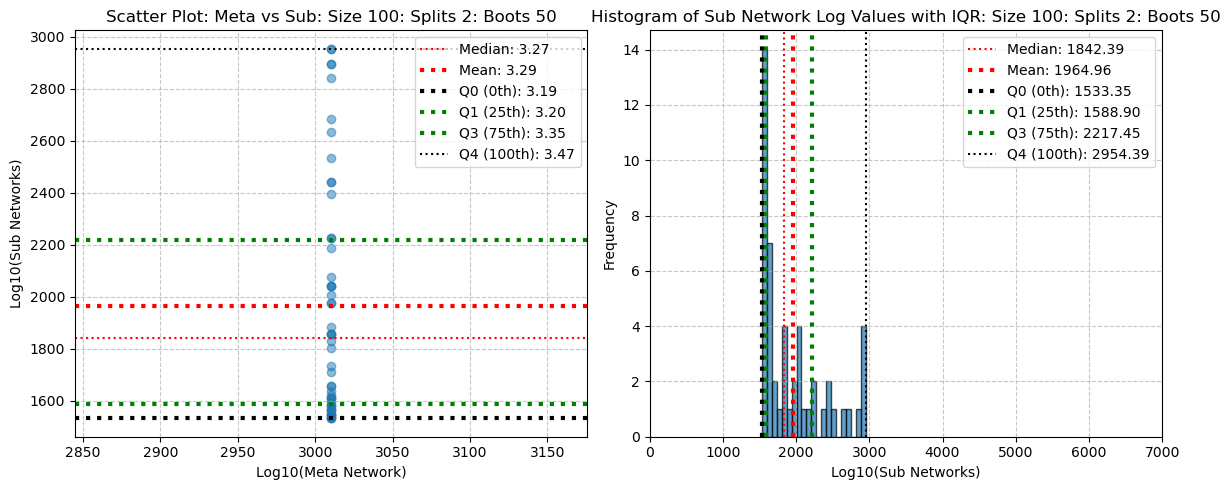

Counter:  1
Minutes:  0.0034548322359720866






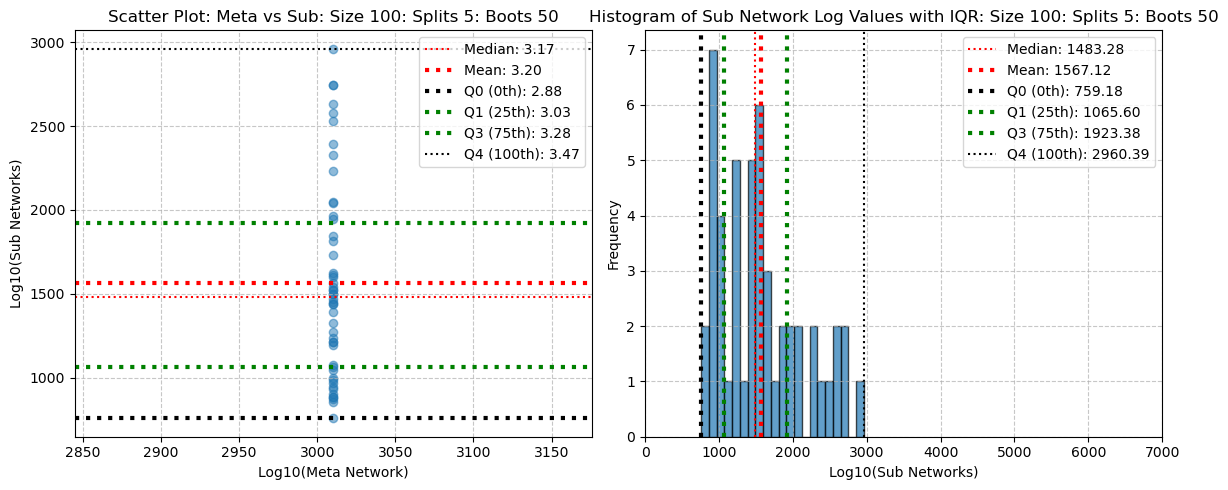

Counter:  2
Minutes:  0.013352616628011068






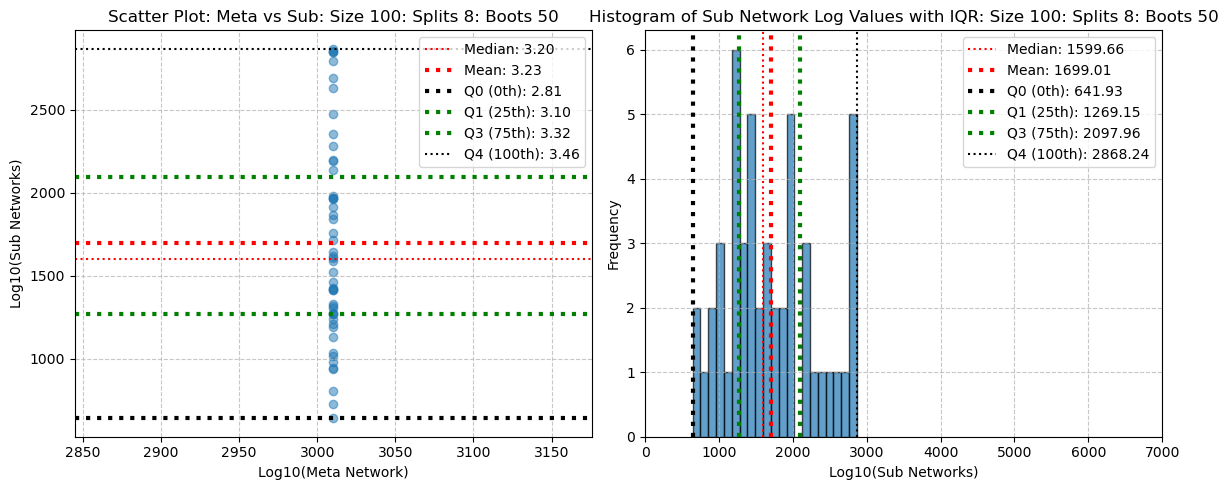

Counter:  3
Minutes:  0.04734584093093872






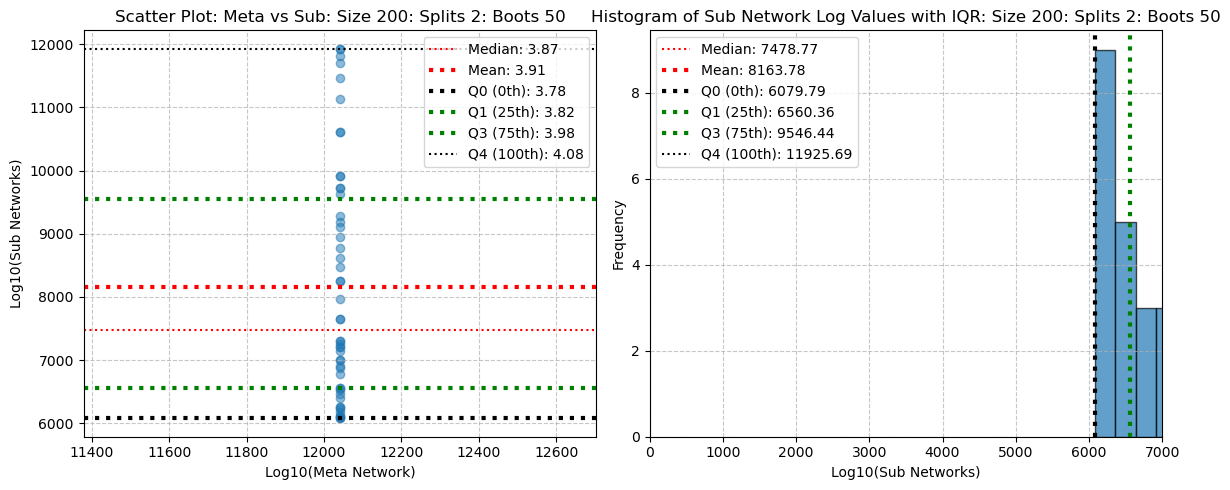

Counter:  4
Minutes:  0.05061471859614054






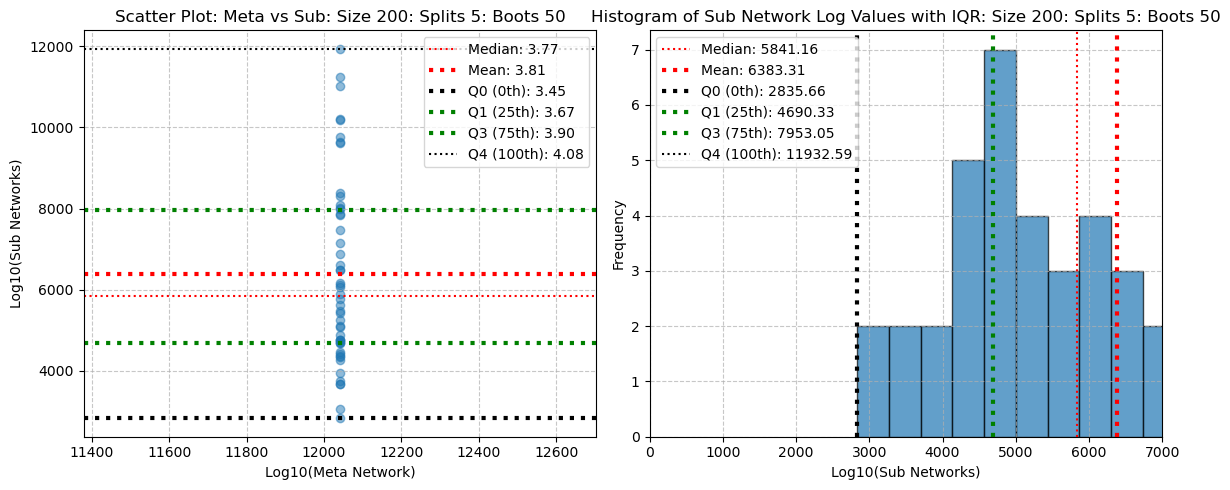

Counter:  5
Minutes:  0.07376118898391723






KeyboardInterrupt: 

In [462]:
%%time
N = [100, 200]#, 500, 1000]
Splits = [2, 5, 8]#, 13]
N_Bootstrap = [50]
counter = 0

t0=time.time()
for n in N:
    for s in Splits:
        for b in N_Bootstrap: 
            print('Session: ', n, ': ', s, ': ', b)
            ### If the number is too large and generates an error, increase the number of splits
            df = Generate_Special_Sum_DF(n, s, b)
            df['Sub'] = df['Sub'].astype(float)
            
            # Calculate median and IQR (Q1 and Q3) of list_Sub
            sub_median = np.median(df['Sub'])
            sub_mean = np.mean(df['Sub'])
            sub_q0 = np.percentile(df['Sub'], 0)
            sub_q1 = np.percentile(df['Sub'], 25)
            sub_q3 = np.percentile(df['Sub'], 75)
            sub_q4 = np.percentile(df['Sub'], 100)
            # Calculate median and IQR (Q1 and Q3) of list_Sub
            # sub_median_log = math.log10(np.median(df['Sub']))
            # sub_mean_log = math.log10(np.mean(df['Sub']))
            # sub_q0_log = math.log10(np.percentile(df['Sub'], 0))
            # sub_q1_log = math.log10(np.percentile(df['Sub'], 25))
            # sub_q3_log = math.log10(np.percentile(df['Sub'], 75))
            # sub_q4_log = math.log10(np.percentile(df['Sub'], 100))
            
            # Create figure with two subplots
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
            
            # 1. Scatter plot of Meta vs Sub
            ax1.scatter(df['Meta'], df['Sub'], alpha=0.5)
            ax1.set_xlabel('Log10(Meta Network)')
            ax1.set_ylabel('Log10(Sub Networks)')
            ax1.set_title('Scatter Plot: Meta vs Sub: Size {}: Splits {}: Boots {}'.format(n, s, b))
            ax1.axhline(sub_median, color='red', linestyle=':', label=f'Median: {math.log10(sub_median):.2f}')
            ax1.axhline(sub_mean, color='red', linestyle=':', label=f'Mean: {math.log10(sub_mean):.2f}', linewidth=3)
            ax1.axhline(sub_q0, color='black', linestyle=':', label=f'Q0 (0th): {math.log10(sub_q0):.2f}', linewidth=3)
            ax1.axhline(sub_q1, color='green', linestyle=':', label=f'Q1 (25th): {math.log10(sub_q1):.2f}', linewidth=3)
            ax1.axhline(sub_q3, color='green', linestyle=':', label=f'Q3 (75th): {math.log10(sub_q3):.2f}', linewidth=3)
            ax1.axhline(sub_q4, color='black', linestyle=':', label=f'Q4 (100th): {math.log10(sub_q4):.2f}')
            ax1.legend()
            
            ax1.grid(True, linestyle='--', alpha=0.7)
            
            # 2. Histogram of list_Sub with median and IQR lines
            ax2.hist(df['Sub'], bins=21, edgecolor='black', alpha=0.7)
            ax2.axvline(sub_median, color='red', linestyle=':', label=f'Median: {sub_median:.2f}')
            ax2.axvline(sub_mean, color='red', linestyle=':', label=f'Mean: {sub_mean:.2f}', linewidth=3)
            ax2.axvline(sub_q0, color='black', linestyle=':', label=f'Q0 (0th): {sub_q0:.2f}', linewidth=3)
            ax2.axvline(sub_q1, color='green', linestyle=':', label=f'Q1 (25th): {sub_q1:.2f}', linewidth=3)
            ax2.axvline(sub_q3, color='green', linestyle=':', label=f'Q3 (75th): {sub_q3:.2f}', linewidth=3)
            ax2.axvline(sub_q4, color='black', linestyle=':', label=f'Q4 (100th): {sub_q4:.2f}')
            ax2.set_xlabel('Log10(Sub Networks)')
            ax2.set_ylabel('Frequency')
            ax2.set_title('Histogram of Sub Network Log Values with IQR: Size {}: Splits {}: Boots {}'.format(n, s, b))
            ax2.grid(True, linestyle='--', alpha=0.7)  # Retain grid lines
            ax2.set_xlim(0, 7000)
            ax2.legend()
            
            # Adjust layout to prevent overlap
            plt.tight_layout()
            plt.show()
            counter +=1
            print('Counter: ', counter)
            print('Minutes: ', (time.time()-t0)/60)
            print('\n\n\n')

$$
\begin{aligned}
 \textbf{How Big is It?}\\
\end{aligned}
$$

$$
\begin{aligned}
\text{Given: } 4\times10^{6} &\approx \text{Transcription Factor Binding Sites per Cell} \\
\\
\text{Given: } 2\times10^{5} &\approx \text{Utilized Transcription Factor Binding Sites per Cell}
\end{aligned}
$$

$$
\textbf{Possible Utilized Transcription Sites per Cell=} \binom{4\times10^{6}}{2\times10^{5}} \approx 1\times10^{344854} 
$$

- At any snapshot in time, there are roughly this many poential transctiption factors being activated in a cell. That is a lot of possible transcription factors. It makes me wonder how on earth a replicating TF cascade can be created in the lab. For example, the sequence of TF states in my liver cells in the presence of alcohol vaires the TF conficurations moment to moment. Lets say Genes 4 5 6 are regulated with frequencies f(4, 1), f(5, 1), f(4, 1) at T1 and f(4, 2), f(5, 2), f(4, 2) at T2.  

In [438]:
### what is 4M C 200K ? 
N = 4000000
C = 200000
D = int(5.e20)
sys.set_int_max_str_digits(D)
len(str(math.comb(N, C)))

OverflowError: Python int too large to convert to C int

In [442]:
P = np.log(2*np.pi*4e6) - np.log(2*np.pi*2e5) - np.log(2*np.pi*3.8e6) + N*np.log(N)- C*np.log(C) - (N-C)*np.log(N-C)
P

np.float64(794046.9807270765)

In [484]:
%time
#!/usr/bin/env python3
import gmpy2

# Set precision for gmpy2 (not strictly necessary for comb, but good practice)
gmpy2.get_context().precision = 1000


def comb_gmpy(n, k, presult=False):
    # Compute the combination C(n, k)
    result = gmpy2.comb(n, k)
    # Print the exact result
    if presult:
        print(f"C({n}, {k}) = {result}")
    # Estimate the number of digits
    num_digits = int(gmpy2.log10(result)) + 1
    print(f"Number of digits in the result: {num_digits}")

# # Optionally, save the result to a file (since it's very large)
# with open("combination_result.txt", "w") as f:
#     f.write(str(result))

def exp2_gmpy(n, presult=False):  
    # Compute the combination C(n, k)
    result = gmpy2.exp2(n)
    # Print the exact result
    if presult:
        print(f"2^({n}) = {result}")
    # Estimate the number of digits
    num_digits = int(gmpy2.log10(result)) + 1
    print(f"Number of digits in the result: {num_digits}")


exp2_gmpy(20000)#, comb_gmpy(4000000, 200000)

CPU times: user 2 μs, sys: 0 ns, total: 2 μs
Wall time: 3.58 μs
Number of digits in the result: 6022


In [ ]:
### How many word combinations are in a book of 50000 words?

In [498]:
import gmpy2
# Create a gmpy2 integer
base = gmpy2.mpz(2000)
# Compute power
# result = gmpy2.powmod(base, 5, 1)  # powmod with modulus=0 acts like normal exponentiation
# Or simply:
result = base ** 50000
print(len(result))  # 1024

548290


$\text{about} \space\space10^{548290} $

In [ ]:
### How many relational combinations are there of 

### Scratch